# Author :- Yashodatta Patil
## Task :-  Handwritten Digit Recognition system using the MNIST dataset with a Neural Network
**psyliq data scientist Internship**

<p style=color:black;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Introducation</p> 

**This project focuses on Handwritten Digit Recognition using a Neural Network, employing the MNIST dataset. By leveraging the power of machine learning, we aim to unravel the complexities of digit classification and offer insights into the practical implementation of image recognition systems.**

<p style=color:black;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Import libraries</p> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import cv2

<p style=color:black;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Import Dataset</p> 

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


*Let's test any data sample to check if it is corect data or not*

label= 5


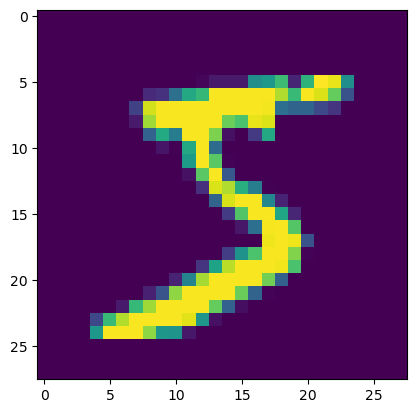

In [5]:
print("label=",y_train[0])
plt.imshow(x_train[0])

<p style=color:black;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Data Preprocessing</p> 

In [6]:
print(x_train.max(), x_train.min(), x_test.max(), x_test.min())

255 0 255 0


In [7]:
y_train[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

- The training data ranges between 0-255, now we will rescale the feature values to be in the range [0, 1]

In [8]:
x_train_processed, x_test_processed = x_train / 255.0, x_test / 255.0

In [9]:
print(x_train_processed.max(), x_train_processed.min(), x_test_processed.max(), x_test_processed.min())

1.0 0.0 1.0 0.0


<p style=color:black;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Build a Classifier using MLP (Multi Layer perceptron)</p> 

In [10]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Flatten, Dense,Dropout
from keras.optimizers import Adam

In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


<p style=color:black;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Compile the Model</p> 

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<p style=color:black;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Train and Test the model.</p> 

In [14]:
history = model.fit(x_train_processed, y_train, epochs=5)
history

Epoch 1/5
1875/1875 [==============================] - 11s 4ms/step - loss: 0.2938 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1448 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1073 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0883 - accuracy: 0.9724
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0751 - accuracy: 0.9763


<p style=color:black;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Evaluation.</p> 

In [15]:
test_loss, test_acc = model.evaluate(x_test_processed, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0736 - accuracy: 0.9779


In [16]:
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

Test Loss:  0.07361837476491928
Test Accuracy:  0.9779000282287598


- Access Loss and Accuracy details from the training history

In [17]:
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']

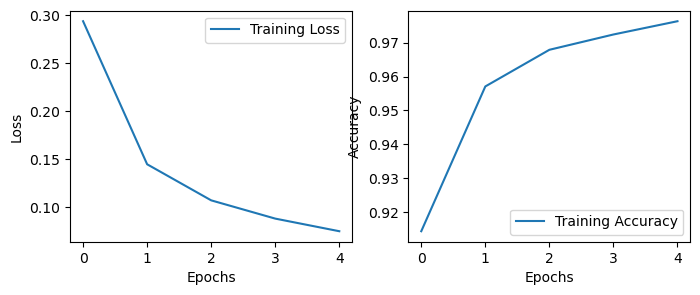

In [18]:
# Create subplots for loss and accuracy
plt.figure(figsize=(8, 3))
# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- As we can see in the graph, loss has been decreased with each epoch where accuracy has been increased

### Let's make predictions on the test test and check whether those predictions are correct or not

In [19]:
model.predict(x_test_processed)[2].argmax()

313/313 [==============================] - 1s 2ms/step


1

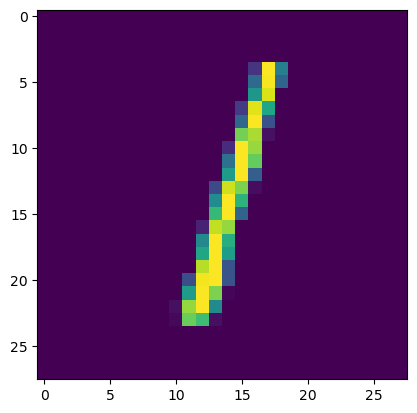

In [20]:
plt.imshow(x_test[2])

In [21]:
y_test[2]

1

In [22]:
y_test[0]

7

313/313 [==============================] - 1s 2ms/step


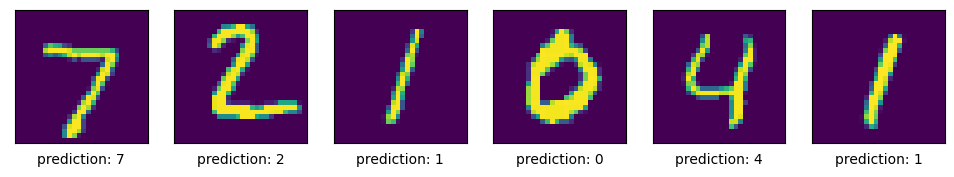

In [23]:
predictions = model.predict(x_test_processed)
plt.figure(figsize=(12, 5))
for i in range(6):
    plt.subplot(1, 6, i+1)
    prediction = predictions[i].argmax()
    image =plt.imshow(x_test_processed[i])
    plt.xlabel('prediction: '+str(prediction))
    plt.xticks([])  # Hide the x-axis scale and ticks
    plt.yticks([])  # Hide the y-axis scale and ticks
    